In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
movies = pd.read_csv('movies_metadata.csv').dropna(axis=1,how='all')

In [4]:
movies.head()

,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862.0,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844.0,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602.0,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.712900,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357.0,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862.0,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.387519,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [5]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45453 entries, 0 to 45452
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   belongs_to_collection  4491 non-null   object 
 1   budget                 45453 non-null  int64  
 2   genres                 45453 non-null  object 
 3   homepage               7777 non-null   object 
 4   id                     45452 non-null  float64
 5   imdb_id                45435 non-null  object 
 6   original_language      45442 non-null  object 
 7   original_title         45453 non-null  object 
 8   overview               44499 non-null  object 
 9   popularity             45450 non-null  float64
 10  poster_path            45067 non-null  object 
 11  production_companies   45450 non-null  object 
 12  production_countries   45450 non-null  object 
 13  release_date           45367 non-null  object 
 14  revenue                45450 non-null  float64
 15  ru

In [6]:
movies.shape

(45453, 23)

In [8]:
budget_df = movies[movies.budget >1e6]

In [9]:
budget_df.shape

(7208, 23)

In [42]:
budget_lookup = pd.Series(list(budget_df.budget),index=budget_df.title)

In [43]:
budget_lookup['Dead Presidents']

10000000

In [35]:
import re

0

In [44]:
budget_lookup.filter(regex='^(A|B)')

title
Ace Ventura: When Nature Calls    30000000
Assassins                         50000000
Babe                              30000000
Bio-Dome                          15000000
Big Bully                         15000000
                                    ...   
Atomic Blonde                     30000000
Air Bud: Spikes Back               5000000
All the Wrong Reasons              1105736
Baby sa jakies inne                1689118
Antidur                            5000000
Length: 933, dtype: int64

In [31]:
budget_lookup_as_and_bs.shape

(881, 23)

In [27]:
budget_lookup_as_and_bs

,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
10,NaN,62000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,9087.0,tt0112346,en,The American President,"Widowed U.S. president Andrew Shepherd, one of...",6.318445,...,1995-11-17,107879496.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Why can't the most powerful man in the world h...,The American President,False,6.5,199.0
18,"{'id': 3167, 'name': 'Ace Ventura Collection',...",30000000,"[{'id': 80, 'name': 'Crime'}, {'id': 35, 'name...",NaN,9273.0,tt0112281,en,Ace Ventura: When Nature Calls,"Summoned from an ashram in Tibet, Ace finds hi...",8.205448,...,1995-11-10,212385533.0,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,New animals. New adventures. Same hair.,Ace Ventura: When Nature Calls,False,6.1,1128.0
22,NaN,50000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",NaN,9691.0,tt0112401,en,Assassins,Assassin Robert Rath arrives at a funeral to k...,11.065939,...,1995-10-06,30303072.0,132.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,"In the shadows of life, In the business of dea...",Assassins,False,6.0,394.0
33,"{'id': 9435, 'name': 'Babe Collection', 'poste...",30000000,"[{'id': 14, 'name': 'Fantasy'}, {'id': 18, 'na...",NaN,9598.0,tt0112431,en,Babe,Babe is a little pig who doesn't quite know hi...,14.404764,...,1995-07-18,254134910.0,89.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A little pig goes a long way.,Babe,False,6.0,756.0
45,NaN,10000000,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",NaN,11861.0,tt0113347,en,How To Make An American Quilt,Soon-to-be-wed graduate student Finn Dodd deve...,4.485958,...,1995-10-06,23574130.0,116.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,There's beauty in the patterns of life.,How To Make An American Quilt,False,6.5,38.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44619,NaN,30000000,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",http://www.atomicblonde.com/,341013.0,tt2406566,en,Atomic Blonde,An undercover MI6 agent is sent to Berlin duri...,14.455104,...,2017-07-26,90007945.0,115.0,"[{'iso_639_1': 'sv', 'name': 'svenska'}, {'iso...",Released,NaN,Atomic Blonde,False,6.1,748.0
44810,"{'id': 97445, 'name': 'Air Bud Collection', 'p...",5000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 10751, '...",NaN,24794.0,tt0337812,en,Air Bud: Spikes Back,In Disney's fifth installment to the franchise...,1.757851,...,2003-07-01,0.0,87.0,"[{'iso_639_1': 'fr', 'name': 'Français'}]",Released,He's The Coolest Player Under The Sun!,Air Bud: Spikes Back,False,4.7,25.0
44837,NaN,2000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,75438.0,tt1820462,ru,Beremennyy,The main character of the film Sergey Dobrolyu...,0.397106,...,2011-07-21,8000000.0,81.0,"[{'iso_639_1': 'ru', 'name': 'Pусский'}]",Released,NaN,Pregnant,False,3.1,7.0
44979,NaN,1105736,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",https://www.facebook.com/AlltheWrongReasonsFil...,212747.0,tt1568799,en,All the Wrong Reasons,An ensemble film about four everyday people: a...,0.492168,...,2013-11-01,0.0,114.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,There's always a right reason to do the wrong ...,All the Wrong Reasons,False,6.1,4.0


In [47]:
test = pd.DataFrame({'a':list("pythonrocks"), 'b':[1,2,3,4,5,6,7,8,9,10,11]})
test = test.set_index('a')


In [53]:
test.sort_index().loc['c':'o']

,b
a,
c,9
h,4
k,10
n,6
o,5
o,8


In [55]:
movies

,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862.0,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844.0,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602.0,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.712900,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357.0,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862.0,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.387519,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45448,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",http://www.imdb.com/title/tt6209470/,439050.0,tt6209470,fa,رگ خواب,Rising and falling between a man and woman.,0.072051,...,NaN,0.0,90.0,"[{'iso_639_1': 'fa', 'name': 'فارسی'}]",Released,Rising and falling between a man and woman,Subdue,False,4.0,1.0
45449,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,111109.0,tt2028550,tl,Siglo ng Pagluluwal,An artist struggles to finish his work while a...,0.178241,...,2011-11-17,0.0,360.0,"[{'iso_639_1': 'tl', 'name': ''}]",Released,NaN,Century of Birthing,False,9.0,3.0
45450,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",NaN,67758.0,tt0303758,en,Betrayal,"When one of her hits goes wrong, a professiona...",0.903007,...,2003-08-01,0.0,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A deadly game of wits.,Betrayal,False,3.8,6.0
45451,NaN,0,[],NaN,227506.0,tt0008536,en,Satana likuyushchiy,"In a small town live two brothers, one a minis...",0.003503,...,1917-10-21,0.0,87.0,[],Released,NaN,Satan Triumphant,False,0.0,0.0


In [56]:
valid_movies = movies[~((movies.runtime > 180) | (movies.runtime < 10))]

In [58]:
valid_movies.runtime.describe()

count    42514.000000
mean        96.687397
std         22.398741
min         10.000000
25%         87.000000
50%         95.000000
75%        107.000000
max        180.000000
Name: runtime, dtype: float64

In [59]:
time_scheduler = valid_movies.set_index('runtime')

In [64]:
time_scheduler = time_scheduler['title'].sort_index()

In [68]:
time_scheduler

runtime
10.0       There Will Come Soft Rains
10.0                          Polygon
10.0                       Rhinoceros
10.0                The Ventriloquist
10.0                    The Smile Man
                    ...              
NaN                   Villa Henriette
NaN           Między nami dobrze jest
NaN                   Ostatni dzwonek
NaN     Simbad e il califfo di Bagdad
NaN                             Aprel
Name: title, Length: 42774, dtype: object

In [71]:
time_scheduler[154].shape

(31,)

In [74]:
time_scheduler.iloc[154]

'Tears of Steel'

In [75]:
highly_rated = movies[(movies.vote_average > 8) & (movies.vote_count > 20)] 

In [76]:
highly_rated

,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
46,NaN,33000000,"[{'id': 80, 'name': 'Crime'}, {'id': 9648, 'na...",http://www.sevenmovie.com/,807.0,tt0114369,en,Se7en,Two homicide detectives are on a desperate hun...,18.457430,...,1995-09-22,327311859.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Seven deadly sins. Seven ways to die.,Se7en,False,8.1,5915.0
49,NaN,6000000,"[{'id': 18, 'name': 'Drama'}, {'id': 80, 'name...",http://www.mgm.com/#/our-titles/2083/The-Usual...,629.0,tt0114814,en,The Usual Suspects,"Held in an L.A. interrogation room, Verbal Kin...",16.302466,...,1995-07-19,23341568.0,106.0,"[{'iso_639_1': 'es', 'name': 'Español'}, {'iso...",Released,Five Criminals. One Line Up. No Coincidence.,The Usual Suspects,False,8.1,3334.0
109,NaN,1300000,"[{'id': 80, 'name': 'Crime'}, {'id': 18, 'name...",NaN,103.0,tt0075314,en,Taxi Driver,A mentally unstable Vietnam War veteran works ...,14.092713,...,1976-02-07,28262574.0,114.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,"On every street in every city, there's a nobod...",Taxi Driver,False,8.1,2632.0
256,"{'id': 10, 'name': 'Star Wars Collection', 'po...",11000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",http://www.starwars.com/films/star-wars-episod...,11.0,tt0076759,en,Star Wars,Princess Leia is captured and held hostage by ...,42.149697,...,1977-05-25,775398007.0,121.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,"A long time ago in a galaxy far, far away...",Star Wars,False,8.1,6778.0
289,NaN,16000000,"[{'id': 53, 'name': 'Thriller'}, {'id': 80, 'n...",NaN,101.0,tt0110413,fr,Léon,"Leon, the top hit man in New York, has earned ...",20.477329,...,1994-09-14,45284974.0,110.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,"If you want a job done well, hire a professional.",Leon: The Professional,False,8.2,4293.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43576,NaN,0,"[{'id': 10402, 'name': 'Music'}, {'id': 99, 'n...",NaN,25771.0,tt0069090,en,Pink Floyd: Live at Pompeii,Stylish film of the British progressive rock b...,5.855108,...,1972-08-31,0.0,85.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,More Than a Movie! An Explosive Cinema Concert!,Pink Floyd: Live at Pompeii,False,8.3,35.0
43962,NaN,0,"[{'id': 99, 'name': 'Documentary'}]",http://www.lifecyclesfilm.com/,51299.0,tt1828232,en,Life Cycles,Life Cycles tells a spectacular story of the b...,1.784965,...,2010-10-02,0.0,47.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Life Cycles,False,8.8,27.0
44377,NaN,0,"[{'id': 35, 'name': 'Comedy'}]",NaN,458310.0,tt6900644,en,Hasan Minhaj: Homecoming King,"Comic Hasan Minhaj of ""The Daily Show"" shares ...",1.531309,...,2017-05-23,0.0,72.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Hasan Minhaj: Homecoming King,False,8.1,22.0
44664,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 27, 'name...",NaN,374430.0,tt3973198,en,Black Mirror: White Christmas,This feature-length special consists of three ...,24.910782,...,2014-12-16,0.0,74.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Black Mirror: White Christmas,False,8.3,211.0


In [ ]:
compare_votes = pd.DataFrame({'Star Wars'})

In [77]:
my_votes = {
    "Star Wars": 9,
    "Paris is Burning": 8,
    "Dead Poets Society": 7,
    "The Empire Strikes Back": 9.5,
    "The Shining": 8,
    "Return of the Jedi": 8,
    "1941": 8,
    "Forrest Gump": 7.5,
}

In [79]:
common = highly_rated[highly_rated.title.isin(my_votes)]

In [ ]:
common.set_index

In [80]:
pd.DataFrame({'my_votes': my_votes,'vote_average': common.vote_average},index=common.title)

,my_votes,vote_average
title,,
Star Wars,9.0,NaN
Forrest Gump,7.5,NaN
Paris is Burning,8.0,NaN
The Empire Strikes Back,9.5,NaN
Dead Poets Society,7.0,NaN
The Shining,8.0,NaN


In [82]:
common = common[['title','vote_average']]

In [85]:
common['my_vote'] = common.title.map(my_votes)

In [87]:
common.set_index('title',inplace=True)

In [88]:
common

,vote_average,my_vote
title,,
Star Wars,8.1,9.0
Forrest Gump,8.2,7.5
Paris is Burning,8.2,8.0
The Empire Strikes Back,8.2,9.5
Dead Poets Society,8.1,7.0
The Shining,8.1,8.0


In [89]:
(common.vote_average - common.my_vote)/common.my_vote

title
Star Wars                 -0.100000
Forrest Gump               0.093333
Paris is Burning           0.025000
The Empire Strikes Back   -0.136842
Dead Poets Society         0.157143
The Shining                0.012500
dtype: float64

In [90]:
movies

,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862.0,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844.0,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602.0,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.712900,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357.0,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862.0,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.387519,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45448,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",http://www.imdb.com/title/tt6209470/,439050.0,tt6209470,fa,رگ خواب,Rising and falling between a man and woman.,0.072051,...,NaN,0.0,90.0,"[{'iso_639_1': 'fa', 'name': 'فارسی'}]",Released,Rising and falling between a man and woman,Subdue,False,4.0,1.0
45449,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,111109.0,tt2028550,tl,Siglo ng Pagluluwal,An artist struggles to finish his work while a...,0.178241,...,2011-11-17,0.0,360.0,"[{'iso_639_1': 'tl', 'name': ''}]",Released,NaN,Century of Birthing,False,9.0,3.0
45450,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",NaN,67758.0,tt0303758,en,Betrayal,"When one of her hits goes wrong, a professiona...",0.903007,...,2003-08-01,0.0,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A deadly game of wits.,Betrayal,False,3.8,6.0
45451,NaN,0,[],NaN,227506.0,tt0008536,en,Satana likuyushchiy,"In a small town live two brothers, one a minis...",0.003503,...,1917-10-21,0.0,87.0,[],Released,NaN,Satan Triumphant,False,0.0,0.0


In [91]:
movies['net_revenue'] = movies['revenue']-movies['budget']

In [102]:
ten_highest_grossing = movies.nlargest(10,'net_revenue')[['title','release_date','revenue','budget','net_revenue']]

In [98]:
pd.options.display.float_format = '${:,.2f}'.format


In [113]:
ten_highest_grossing['budget'] = ten_highest_grossing['budget'].astype('float')

In [114]:
ten_highest_grossing

,title,release_date,revenue,budget,net_revenue
14551,Avatar,2009-12-10,"$2,787,965,087.00","$237,000,000.00","$2,550,965,087.00"
26553,Star Wars: The Force Awakens,2015-12-15,"$2,068,223,624.00","$245,000,000.00","$1,823,223,624.00"
1639,Titanic,1997-11-18,"$1,845,034,188.00","$200,000,000.00","$1,645,034,188.00"
25082,Jurassic World,2015-06-09,"$1,513,528,810.00","$150,000,000.00","$1,363,528,810.00"
28827,Furious 7,2015-04-01,"$1,506,249,360.00","$190,000,000.00","$1,316,249,360.00"
17818,The Avengers,2012-04-25,"$1,519,557,910.00","$220,000,000.00","$1,299,557,910.00"
17437,Harry Potter and the Deathly Hallows: Part 2,2011-07-07,"$1,342,000,000.00","$125,000,000.00","$1,217,000,000.00"
26556,Avengers: Age of Ultron,2015-04-22,"$1,405,403,694.00","$280,000,000.00","$1,125,403,694.00"
22108,Frozen,2013-11-27,"$1,274,219,009.00","$150,000,000.00","$1,124,219,009.00"
42210,Beauty and the Beast,2017-03-16,"$1,262,886,337.00","$160,000,000.00","$1,102,886,337.00"


In [125]:
pd.options.display.float_format = '{:,.2f}'.format


In [120]:
ten_lowest_grossing = movies.nsmallest(10,'net_revenue')

In [121]:
ten_lowest_grossing[['title','release_date','revenue','budget','net_revenue']]

,title,release_date,revenue,budget,net_revenue
21173,The Lone Ranger,2013-07-03,"$89,289,910.00","$255,000,000.00","$-165,710,090.00"
14823,The Wolfman,2010-02-11,$0.00,"$150,000,000.00","$-150,000,000.00"
32843,Pokémon the Movie: Hoopa and the Clash of Ages,2015-07-18,$0.00,"$150,000,000.00","$-150,000,000.00"
43177,Band of Brothers,2001-09-09,$0.00,"$125,000,000.00","$-125,000,000.00"
27654,The Pacific,2010-03-15,$0.00,"$120,000,000.00","$-120,000,000.00"
7226,The Alamo,2004-04-07,"$25,819,961.00","$145,000,000.00","$-119,180,039.00"
16788,Mars Needs Moms,2011-03-09,"$38,992,758.00","$150,000,000.00","$-111,007,242.00"
44324,Valerian and the City of a Thousand Planets,2017-07-20,"$90,024,292.00","$197,471,676.00","$-107,447,384.00"
30730,Double Wedding,2010-07-20,$0.00,"$104,002,432.00","$-104,002,432.00"
6740,Brother Bear,2003-10-23,$0.00,"$100,000,000.00","$-100,000,000.00"


In [119]:
movies['budget'] = movies['budget'].astype('float')

In [130]:
movies.budget.corr(movies.net_revenue)

0.61433696080791

In [132]:
movies['release_date'] = pd.to_datetime(movies.release_date)

In [135]:
movies.release_date

0       1995-10-30
1       1995-12-15
2       1995-12-22
3       1995-12-22
4       1995-02-10
           ...    
45448          NaT
45449   2011-11-17
45450   2003-08-01
45451   1917-10-21
45452   2017-06-09
Name: release_date, Length: 45453, dtype: datetime64[ns]

In [138]:
dates = movies.set_index('release_date')

In [142]:
dates.resample('Y')[['budget','revenue','net_revenue']].mean()

,budget,revenue,net_revenue
release_date,,,
1874-12-31,0.00,0.00,0.00
1875-12-31,NaN,NaN,NaN
1876-12-31,NaN,NaN,NaN
1877-12-31,NaN,NaN,NaN
1878-12-31,0.00,0.00,0.00
...,...,...,...
2016-12-31,"6,494,352.54","19,025,500.01","12,531,147.47"
2017-12-31,"8,997,289.23","28,338,148.45","19,340,859.22"
2018-12-31,"6,000,000.00",0.00,"-6,000,000.00"


In [148]:
dates.index = dates.index.to_period('Y')

In [151]:
dates.sort_index(inplace=True)

In [158]:
dates = dates[~dates.index.isna()]

In [159]:
dates

,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,net_revenue
release_date,,,,,,,,,,,,,,,,,,,,,
1874,NaN,0.00,"[{'id': 99, 'name': 'Documentary'}]",NaN,"315,946.00",tt3155794,xx,Passage de Venus,Photo sequence of the rare transit of Venus ov...,0.48,...,0.00,1.00,"[{'iso_639_1': 'xx', 'name': 'No Language'}]",Released,NaN,Passage of Venus,False,6.00,19.00,0.00
1878,NaN,0.00,"[{'id': 99, 'name': 'Documentary'}]",NaN,"194,079.00",tt2221420,en,Sallie Gardner at a Gallop,Sallie Gardner at a Gallop was one of the earl...,0.33,...,0.00,1.00,"[{'iso_639_1': 'xx', 'name': 'No Language'}]",Released,NaN,Sallie Gardner at a Gallop,False,6.20,25.00,0.00
1883,NaN,0.00,"[{'id': 99, 'name': 'Documentary'}]",NaN,"426,903.00",tt5459794,en,Buffalo Running,Individual photographs of the running of a buf...,0.23,...,0.00,1.00,"[{'iso_639_1': 'xx', 'name': 'No Language'}]",Released,NaN,Buffalo Running,False,5.40,7.00,0.00
1887,NaN,0.00,"[{'id': 99, 'name': 'Documentary'}]",NaN,"159,897.00",tt2075247,xx,Man Walking Around a Corner,The last remaining production of Le Prince's L...,1.18,...,0.00,1.00,"[{'iso_639_1': 'xx', 'name': 'No Language'}]",Released,NaN,Man Walking Around a Corner,False,4.10,17.00,0.00
1888,NaN,0.00,"[{'id': 99, 'name': 'Documentary'}]",NaN,"96,882.00",tt1758563,xx,Accordion Player,The last remaining film of Le Prince's LPCCP T...,0.21,...,0.00,1.00,"[{'iso_639_1': 'xx', 'name': 'No Language'}]",Released,NaN,Accordion Player,False,4.40,18.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018,"{'id': 14890, 'name': 'Bad Boys Collection', '...",0.00,"[{'id': 53, 'name': 'Thriller'}, {'id': 28, 'n...",NaN,"38,700.00",tt1502397,en,Bad Boys for Life,The continuing adventures of Miami detectives ...,2.18,...,0.00,0.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Planned,NaN,Bad Boys for Life,False,0.00,12.00,0.00
2018,NaN,0.00,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",NaN,"332,283.00",tt3906082,en,Mary Shelley,The love affair between poet Percy Shelley and...,3.33,...,0.00,0.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Post Production,NaN,Mary Shelley,False,0.00,1.00,0.00
2018,NaN,"12,000,000.00","[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,"299,782.00",tt0069049,en,The Other Side of the Wind,"Orson Welles' unfinished masterpiece, restored...",0.24,...,0.00,0.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Post Production,NaN,The Other Side of the Wind,False,0.00,1.00,"-12,000,000.00"


<Figure size 1440x864 with 0 Axes>

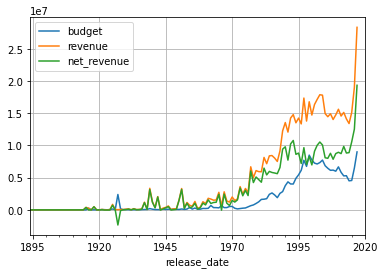

In [223]:
fig = plt.figure(figsize=(20,12))
ax =dates.loc[:'2017'].resample('Y')[['budget','revenue','net_revenue']].mean().plot()
ax.legend(loc='upper left')
ax.set_xlim("Jan 1894","Dec 2020")
ax.grid()
plt.show()

In [163]:
type(movies.genres[0])

str

In [164]:
movies.genres[0]

"[{'id': 16, 'name': 'Animation'}, {'id': 35, 'name': 'Comedy'}, {'id': 10751, 'name': 'Family'}]"

In [165]:
from ast import literal_eval

In [168]:
literal_eval('{"id": 18,"name": "Drama"}')

{'id': 18, 'name': 'Drama'}

In [169]:
movies.genres.sample(10)

43183                                                   []
10715    [{'id': 18, 'name': 'Drama'}, {'id': 27, 'name...
37846                       [{'id': 35, 'name': 'Comedy'}]
4842     [{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...
22166    [{'id': 10749, 'name': 'Romance'}, {'id': 878,...
18418                        [{'id': 18, 'name': 'Drama'}]
29844    [{'id': 35, 'name': 'Comedy'}, {'id': 80, 'nam...
38604    [{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...
1581     [{'id': 10749, 'name': 'Romance'}, {'id': 80, ...
1129                   [{'id': 99, 'name': 'Documentary'}]
Name: genres, dtype: object

In [178]:
def get_genres(value):
    
    try:
        return literal_eval(value)
    except:
        print(value)
        return []

In [180]:
movies['true_genres'] = movies.genres.apply(get_genres)

In [176]:
movies.at[0,'genres']

"[{'id': 16, 'name': 'Animation'}, {'id': 35, 'name': 'Comedy'}, {'id': 10751, 'name': 'Family'}]"

In [181]:
movies.true_genres[0]

[{'id': 16, 'name': 'Animation'},
 {'id': 35, 'name': 'Comedy'},
 {'id': 10751, 'name': 'Family'}]

In [189]:
from collections import defaultdict

In [199]:
genres = Counter()

In [200]:
def counts(value):
    
    for genre in value:
        genres[genre['name']] += 1

In [201]:
movies.true_genres.apply(counts)

0        None
1        None
2        None
3        None
4        None
         ... 
45448    None
45449    None
45450    None
45451    None
45452    None
Name: true_genres, Length: 45453, dtype: object

In [203]:
genres.most_common(5)

[('Drama', 20261),
 ('Comedy', 13179),
 ('Thriller', 7622),
 ('Romance', 6733),
 ('Action', 6596)]

In [225]:
from collections import Counter

In [226]:
movies.columns

Index(['belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count', 'net_revenue', 'true_genres'],
      dtype='object')

In [228]:
movies['original_language'].value_counts().head(10)

en    32263
fr     2438
it     1528
ja     1350
de     1080
es      993
ru      826
hi      508
ko      444
zh      409
Name: original_language, dtype: int64

In [229]:
movies['production_companies']

0           [{'name': 'Pixar Animation Studios', 'id': 3}]
1        [{'name': 'TriStar Pictures', 'id': 559}, {'na...
2        [{'name': 'Warner Bros.', 'id': 6194}, {'name'...
3        [{'name': 'Twentieth Century Fox Film Corporat...
4        [{'name': 'Sandollar Productions', 'id': 5842}...
                               ...                        
45448                                                   []
45449               [{'name': 'Sine Olivia', 'id': 19653}]
45450    [{'name': 'American World Pictures', 'id': 6165}]
45451                 [{'name': 'Yermoliev', 'id': 88753}]
45452                                                   []
Name: production_companies, Length: 45453, dtype: object

In [232]:
production = movies.production_companies.dropna().apply(literal_eval)

In [233]:
production

0           [{'name': 'Pixar Animation Studios', 'id': 3}]
1        [{'name': 'TriStar Pictures', 'id': 559}, {'na...
2        [{'name': 'Warner Bros.', 'id': 6194}, {'name'...
3        [{'name': 'Twentieth Century Fox Film Corporat...
4        [{'name': 'Sandollar Productions', 'id': 5842}...
                               ...                        
45448                                                   []
45449               [{'name': 'Sine Olivia', 'id': 19653}]
45450    [{'name': 'American World Pictures', 'id': 6165}]
45451                 [{'name': 'Yermoliev', 'id': 88753}]
45452                                                   []
Name: production_companies, Length: 45450, dtype: object

In [237]:
production_counts = Counter()

def get_companies(value):
    
    for studio in value:
        production_counts[studio['name']] += 1

In [238]:
production.apply(get_companies)

0        None
1        None
2        None
3        None
4        None
         ... 
45448    None
45449    None
45450    None
45451    None
45452    None
Name: production_companies, Length: 45450, dtype: object

In [240]:
production_counts.most_common(20)

[('Warner Bros.', 1250),
 ('Metro-Goldwyn-Mayer (MGM)', 1076),
 ('Paramount Pictures', 1003),
 ('Twentieth Century Fox Film Corporation', 836),
 ('Universal Pictures', 830),
 ('Columbia Pictures Corporation', 448),
 ('Canal+', 438),
 ('Columbia Pictures', 431),
 ('RKO Radio Pictures', 290),
 ('United Artists', 279),
 ('New Line Cinema', 277),
 ('Walt Disney Pictures', 263),
 ('Touchstone Pictures', 225),
 ('TriStar Pictures', 197),
 ('Mosfilm', 188),
 ('Miramax Films', 183),
 ('France 2 Cinéma', 168),
 ('Centre National de la Cinématographie (CNC)', 163),
 ('Toho Company', 142),
 ('BBC Films', 131)]